In [12]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [20]:
# Initialize the base classifier
base_classifier = DecisionTreeClassifier(max_depth=7)

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9911111111111112

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        41
           8       1.00      0.97      0.99        38
           9       1.00      0.98      0.99        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  1  0 47]]
Overall Acuracy:0.991


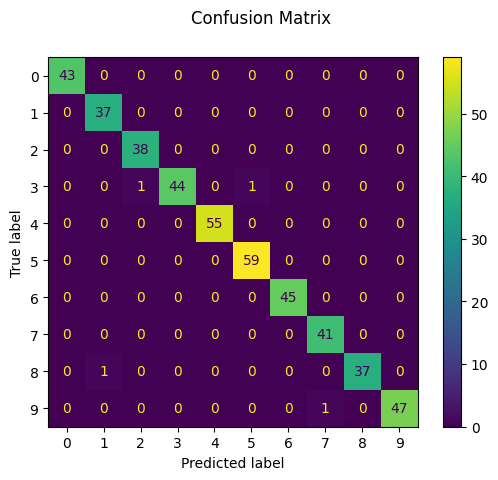

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
accu = metrics.accuracy_score(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
print('Overall Acuracy:{:.3}'.format(accu))